In [1]:
import matplotlib.pyplot as plt
import pylidc as pl
import numpy as np
import os
import re
import glob

In [5]:
file_count =  glob.glob('/media/HDD2TB_2/nathan/Patches/'+'**')
len(file_count)

23063

In [3]:
file_count =  glob.glob('/media/HDD2TB_2/nathan/Patches/'+'*.npz*')
len(file_count)

23063

In [29]:
file_count =  glob.glob('/media/HDD2TB_2/nathan/Pseg/'+'*.npz*')
len(file_count)

23063

In [139]:
file_count =  glob.glob('/media/HDD2TB_2/nathan/segmented_lungs/32_Patches/**')
len(file_count)

23188

In [138]:
for file in file_count:
    os. unlink(file)

In [61]:
lol = []
for file in file_count:
    lol.append(file.split('/')[-1])

In [64]:
lul = []
for file in file_count:
    lul.append(file.split('/')[-1])

In [67]:
set(lol) ^ set(lul)

{'v024_nod:827.npz', 'v135_nod:604.npz'}

In [116]:
np.load(file_count[300])['arr_0'].shape

(32, 32, 16)

In [168]:
file_count =  glob.glob('/media/HDD2TB_2/nathan/segmented_lungs/32_trans/**')

In [169]:
len(file_count)

11658

In [172]:
bonk = []

for file in file_count:
    vol = np.load(file)['arr_0']
    if vol.shape[2] != 16:
        bonk.append(file)

In [173]:
len(bonk)

60

In [174]:
for bon in bonk:
    os. unlink(bon)

In [141]:
ann = pl.query(pl.Annotation)

A = []

i=0
while i < 6859:
    A.append(ann[i].scan.patient_id)
    i+=1

In [142]:
ann[3000].Malignancy

'Moderately Suspicious'

In [163]:
i=0
U = np.unique(A)

for u in U:
    print(i,' :     ' ,"" + str(round((i/6859)*10000)/100) + " %")
    
    ID = int(A[i][-4:])
    count = A.count(A[i])
    
    try:
        scan = np.load('/media/HDD2TB_2/nathan/segmented_lungs/lungs/'+str(ID)+'.npz')['arr_0']
        nods = np.load('/media/HDD2TB_2/nathan/segmented_lungs/nods/'+str(ID)+'.npz')['arr_0']
        
        for j in range(i, i+count):
            a = [int(k) for k in re.findall('\d+', str(ann[j].bbox()))]
            np.savez_compressed('/media/HDD2TB_2/nathan/segmented_lungs/32_trans/nod:'+str(j)+'+++', 
                                scan[int((a[1]+a[0])/2)-16 + 8 : int((a[1]+a[0])/2)+16 +8,  
                                     int((a[3]+a[2])/2)-16 + 8 : int((a[3]+a[2])/2)+16 +8,
                                     int((a[5]+a[4])/2)-8 +4 : int((a[5]+a[4])/2)+8 +4 ])
            np.savez_compressed('/media/HDD2TB_2/nathan/segmented_lungs/32_trans/nod:'+str(j)+'+++',
                                nods[int((a[1]+a[0])/2)-16 + 8 : int((a[1]+a[0])/2)+16 +8,  
                                     int((a[3]+a[2])/2)-16 + 8 : int((a[3]+a[2])/2)+16 +8,
                                     int((a[5]+a[4])/2)-8 +4 : int((a[5]+a[4])/2)+8 +4 ])
    except:
        print('scan: ', ID, 'did not load')
    i = i+count

0  :      0.0 %
13  :      0.19 %
22  :      0.32 %
26  :      0.38 %
28  :      0.41 %
scan:  110 did not load
34  :      0.5 %
38  :      0.55 %
67  :      0.98 %
88  :      1.28 %
90  :      1.31 %
103  :      1.5 %
107  :      1.56 %
116  :      1.69 %
124  :      1.81 %
129  :      1.88 %
136  :      1.98 %
138  :      2.01 %
145  :      2.11 %
168  :      2.45 %
204  :      2.97 %
214  :      3.12 %
218  :      3.18 %
222  :      3.24 %
243  :      3.54 %
247  :      3.6 %
261  :      3.81 %
263  :      3.83 %
268  :      3.91 %
274  :      3.99 %
278  :      4.05 %
290  :      4.23 %
291  :      4.24 %
294  :      4.29 %
313  :      4.56 %
314  :      4.58 %
318  :      4.64 %
332  :      4.84 %
337  :      4.91 %
340  :      4.96 %
342  :      4.99 %
347  :      5.06 %
354  :      5.16 %
355  :      5.18 %
375  :      5.47 %
382  :      5.57 %
389  :      5.67 %
411  :      5.99 %
scan:  43 did not load
421  :      6.14 %
434  :      6.33 %
467  :      6.81 %
488  :      7.11 %

3071  :      44.77 %
scan:  423 did not load
3075  :      44.83 %
3083  :      44.95 %
3087  :      45.01 %
scan:  427 did not load
3099  :      45.18 %
3106  :      45.28 %
3113  :      45.39 %
3114  :      45.4 %
3115  :      45.41 %
3130  :      45.63 %
scan:  434 did not load
3142  :      45.81 %
3160  :      46.07 %
3166  :      46.16 %
3181  :      46.38 %
scan:  438 did not load
3185  :      46.44 %
3191  :      46.52 %
3200  :      46.65 %
3219  :      46.93 %
3225  :      47.02 %
3227  :      47.05 %
3232  :      47.12 %
scan:  447 did not load
3242  :      47.27 %
3254  :      47.44 %
3259  :      47.51 %
3288  :      47.94 %
3292  :      48.0 %
3300  :      48.11 %
scan:  453 did not load
3304  :      48.17 %
3325  :      48.48 %
3337  :      48.65 %
scan:  457 did not load
3341  :      48.71 %
scan:  458 did not load
3349  :      48.83 %
scan:  459 did not load
3354  :      48.9 %
3360  :      48.99 %
3372  :      49.16 %
scan:  462 did not load
3382  :      49.31 %
scan:  

5526  :      80.57 %
5532  :      80.65 %
5537  :      80.73 %
5545  :      80.84 %
5567  :      81.16 %
5571  :      81.22 %
scan:  841 did not load
5573  :      81.25 %
scan:  840 did not load
5574  :      81.27 %
5590  :      81.5 %
5599  :      81.63 %
scan:  836 did not load
5605  :      81.72 %
5613  :      81.83 %
scan:  834 did not load
5618  :      81.91 %
5619  :      81.92 %
5625  :      82.01 %
5626  :      82.02 %
5629  :      82.07 %
5632  :      82.11 %
scan:  828 did not load
5636  :      82.17 %
5648  :      82.34 %
5654  :      82.43 %
5657  :      82.48 %
5659  :      82.5 %
5660  :      82.52 %
5678  :      82.78 %
scan:  821 did not load
5683  :      82.85 %
5691  :      82.97 %
scan:  819 did not load
5700  :      83.1 %
5702  :      83.13 %
scan:  817 did not load
5703  :      83.15 %
5709  :      83.23 %
5714  :      83.31 %
5721  :      83.41 %
scan:  813 did not load
5727  :      83.5 %
5729  :      83.53 %
scan:  811 did not load
5733  :      83.58 %
5742  : 

IndexError: list index out of range

# size of the nodules

In [ ]:
i=0
U = np.unique(A)

for u in U:
    print(i,' :     ' ,"" + str(round((i/6859)*10000)/100) + " %")
    
    ID = int(A[i][-4:])
    count = A.count(A[i])
    
    try:
        scan = np.load('/media/HDD2TB_2/nathan/segmented_lungs/lungs/'+str(ID)+'.npz')['arr_0']
        nods = np.load('/media/HDD2TB_2/nathan/segmented_lungs/nods/'+str(ID)+'.npz')['arr_0']
        
        for j in range(i, i+count):
            a = [int(k) for k in re.findall('\d+', str(ann[j].bbox()))]
            print(a[1]-a[0],"|",a[3]-a[2],"|",a[5]-a[4])
    except:
        print('scan: ', ID, 'did not load')
    i = i+count

0  :      0.0 %
34 | 27 | 6
27 | 28 | 6
35 | 35 | 8
48 | 39 | 8
34 | 27 | 6
33 | 40 | 6
48 | 36 | 7
8 | 7 | 2
37 | 22 | 4
32 | 42 | 5
38 | 39 | 8
29 | 26 | 6
29 | 29 | 4
13  :      0.19 %
28 | 35 | 7
6 | 7 | 1
18 | 14 | 8
25 | 35 | 7
15 | 13 | 5
28 | 43 | 11
26 | 19 | 9
25 | 35 | 7
13 | 12 | 6
22  :      0.32 %
25 | 18 | 5
23 | 19 | 5
20 | 18 | 3
26 | 22 | 5
26  :      0.38 %
18 | 7 | 2
21 | 8 | 2
28  :      0.41 %
scan:  110 did not load
34  :      0.5 %
30 | 27 | 8
29 | 27 | 8
31 | 30 | 8
29 | 26 | 8
38  :      0.55 %
38 | 50 | 6
40 | 62 | 6
11 | 13 | 3
11 | 11 | 3
16 | 15 | 2
18 | 14 | 1
36 | 48 | 5
21 | 15 | 1
11 | 13 | 3
13 | 11 | 3
36 | 49 | 5
14 | 14 | 3
8 | 6 | 2
31 | 20 | 6
9 | 10 | 2
8 | 6 | 1
10 | 12 | 2
8 | 7 | 2
14 | 11 | 3
13 | 11 | 2
10 | 8 | 2
12 | 11 | 2
29 | 19 | 6
10 | 11 | 2
16 | 13 | 3
13 | 11 | 2
9 | 8 | 1
10 | 11 | 1
8 | 7 | 1
67  :      0.98 %
scan:  136 did not load
88  :      1.28 %
41 | 50 | 23
33 | 36 | 7
90  :      1.31 %
11 | 17 | 4
18 | 18 | 5
30 | 34 | 7

16 | 12 | 4
7 | 9 | 1
29 | 30 | 6
41 | 46 | 15
28 | 29 | 6
16 | 12 | 4
10 | 16 | 3
40 | 46 | 15
38 | 34 | 23
7 | 10 | 2
650  :      9.48 %
13 | 13 | 4
22 | 20 | 6
12 | 10 | 3
13 | 11 | 2
14 | 15 | 6
15 | 15 | 3
10 | 9 | 3
9 | 8 | 2
13 | 12 | 4
11 | 11 | 3
660  :      9.62 %
37 | 37 | 10
31 | 27 | 9
31 | 25 | 8
37 | 38 | 10
32 | 27 | 9
37 | 38 | 10
36 | 36 | 10
30 | 24 | 11
668  :      9.74 %
8 | 8 | 2
7 | 7 | 2
670  :      9.77 %
32 | 25 | 31
23 | 18 | 11
11 | 15 | 4
41 | 49 | 23
23 | 18 | 11
15 | 15 | 4
33 | 33 | 31
21 | 18 | 13
14 | 17 | 7
43 | 41 | 35
21 | 20 | 14
681  :      9.93 %
scan:  67 did not load
695  :      10.13 %
21 | 20 | 10
20 | 16 | 9
13 | 15 | 7
14 | 16 | 6
9 | 10 | 5
21 | 18 | 8
8 | 7 | 3
11 | 15 | 6
19 | 14 | 7
11 | 10 | 5
9 | 10 | 4
22 | 19 | 8
8 | 8 | 3
12 | 14 | 6
9 | 10 | 4
11 | 11 | 5
17 | 14 | 7
9 | 9 | 5
10 | 10 | 6
13 | 14 | 6
18 | 15 | 8
22 | 19 | 8
717  :      10.45 %
10 | 9 | 2
11 | 9 | 2
6 | 8 | 2
7 | 6 | 1
6 | 8 | 2
7 | 6 | 1
11 | 11 | 2
724  :      10

11 | 12 | 4
13 | 12 | 4
6 | 8 | 2
11 | 11 | 4
7 | 6 | 1
14 | 13 | 4
1261  :      18.38 %
19 | 19 | 15
19 | 19 | 14
23 | 17 | 15
21 | 19 | 15
1265  :      18.44 %
9 | 11 | 3
10 | 10 | 4
9 | 14 | 1
9 | 9 | 3
10 | 10 | 3
10 | 8 | 2
9 | 10 | 2
10 | 10 | 2
12 | 13 | 4
12 | 13 | 3
9 | 10 | 3
10 | 9 | 2
10 | 12 | 3
11 | 11 | 2
12 | 13 | 3
1280  :      18.66 %
20 | 18 | 6
20 | 27 | 6
20 | 19 | 6
18 | 24 | 5
22 | 26 | 5
19 | 17 | 5
7 | 6 | 1
21 | 19 | 5
21 | 26 | 6
1289  :      18.79 %
9 | 9 | 3
16 | 13 | 4
9 | 8 | 3
10 | 10 | 3
9 | 8 | 2
9 | 8 | 2
8 | 7 | 1
6 | 6 | 1
12 | 12 | 2
10 | 10 | 1
9 | 8 | 2
9 | 10 | 3
8 | 8 | 2
9 | 9 | 2
10 | 10 | 3
14 | 12 | 2
1305  :      19.03 %
23 | 24 | 4
22 | 22 | 4
24 | 25 | 4
23 | 24 | 4
13 | 16 | 4
14 | 15 | 4
13 | 13 | 4
1312  :      19.13 %
12 | 14 | 4
21 | 25 | 6
26 | 26 | 6
21 | 23 | 7
1316  :      19.19 %
26 | 27 | 6
21 | 24 | 6
30 | 25 | 7
10 | 9 | 3
17 | 14 | 4
19 | 18 | 4
1322  :      19.27 %
18 | 17 | 4
19 | 17 | 4
20 | 19 | 4
11 | 9 | 1
1326  :    

# clean up wrong shapes

In [24]:
file_count =  glob.glob('/media/HDD2TB_2/nathan/segmented_lungs/32_Pseg/'+'**')
len(file_count)

5797

In [17]:
delete = []

In [18]:
for file in file_count:
    patch = np.load(file)['arr_0']
    
    if patch.shape[2] != 16: 
        delete.append(file)
        print(patch.shape)
        
    if patch.shape[0] != 32: 
        delete.append(file)
        print(patch.shape)
        
    if patch.shape[1] != 32: 
        delete.append(file)
        print(patch.shape)

(32, 32, 11)
(32, 32, 0)
(32, 32, 0)
(32, 32, 15)
(32, 32, 0)
(32, 32, 15)
(32, 32, 0)
(32, 32, 0)
(32, 32, 0)
(32, 32, 0)
(32, 32, 0)
(32, 32, 0)
(32, 32, 0)
(32, 32, 0)
(32, 32, 0)
(32, 32, 9)
(32, 32, 0)
(32, 32, 14)
(32, 32, 0)
(32, 32, 0)
(32, 32, 9)
(32, 32, 0)
(32, 32, 0)
(32, 32, 0)
(32, 32, 0)
(32, 32, 0)
(32, 32, 10)
(32, 32, 0)
(32, 32, 0)
(32, 32, 10)
(32, 32, 11)


In [19]:
for file in delete:
    os. unlink(file)

In [26]:
file_count1 =  glob.glob('/media/HDD2TB_2/nathan/segmented_lungs/32_Pseg/'+'**')
len(file_count1)

5797

In [27]:
Pseg = []
for file in file_count1:
    Pseg.append(file.split('/')[-1])

In [28]:
file_count2 =  glob.glob('/media/HDD2TB_2/nathan/segmented_lungs/32_Patches/'+'**')
print(len(file_count2))

Patches = []
for file in file_count2:
    Patches.append(file.split('/')[-1])

5798


In [31]:
diff = set(Patches)-set(Pseg)

In [36]:
for delete in diff:
    os. unlink('/media/HDD2TB_2/nathan/segmented_lungs/32_Pseg/'+delete)

FileNotFoundError: [Errno 2] No such file or directory: '/media/HDD2TB_2/nathan/segmented_lungs/32_Pseg/nod:4547.npz'

In [38]:
file_count1 =  glob.glob('/media/HDD2TB_2/nathan/segmented_lungs/32_Patches/'+'**')
len(file_count1)

5797

In [32]:
diff

{'nod:4547.npz'}

# Artifact

In [8]:
file_count =  glob.glob('/media/HDD2TB_2/nathan/clean_scans/'+'**')
len(file_count)

853

In [10]:
lol = []

for file in file_count:
    lol.append(int(file.split('/')[-1][:-4]))

In [48]:
ya = set(np.arange(1012)) ^ set(lol)

In [50]:
ya

{0,
 43,
 67,
 87,
 110,
 127,
 142,
 167,
 181,
 218,
 238,
 296,
 298,
 304,
 305,
 306,
 308,
 311,
 320,
 333,
 335,
 339,
 340,
 344,
 345,
 348,
 353,
 354,
 361,
 364,
 369,
 381,
 389,
 394,
 395,
 406,
 414,
 415,
 420,
 423,
 427,
 434,
 438,
 447,
 453,
 457,
 458,
 459,
 462,
 463,
 467,
 475,
 476,
 480,
 487,
 513,
 523,
 524,
 532,
 539,
 541,
 546,
 551,
 552,
 553,
 555,
 563,
 574,
 579,
 585,
 598,
 618,
 619,
 621,
 628,
 631,
 649,
 653,
 661,
 663,
 666,
 668,
 670,
 684,
 685,
 692,
 695,
 696,
 697,
 699,
 704,
 705,
 709,
 714,
 723,
 736,
 737,
 744,
 748,
 758,
 767,
 769,
 777,
 780,
 785,
 789,
 790,
 801,
 804,
 811,
 813,
 817,
 819,
 821,
 828,
 834,
 836,
 840,
 841,
 848,
 850,
 852,
 858,
 860,
 866,
 872,
 874,
 877,
 882,
 883,
 891,
 894,
 897,
 898,
 899,
 900,
 905,
 911,
 917,
 920,
 926,
 927,
 928,
 933,
 944,
 946,
 948,
 954,
 955,
 959,
 960,
 961,
 969,
 985,
 994,
 995,
 999,
 1001,
 1005,
 1007,
 1012}

In [43]:
pid = 'LIDC-IDRI-0598'
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()
vol = scan.to_volume()

Loading dicom files ... This may take a moment.


414
Loading dicom files ... This may take a moment.


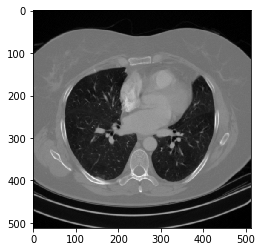

415
Loading dicom files ... This may take a moment.


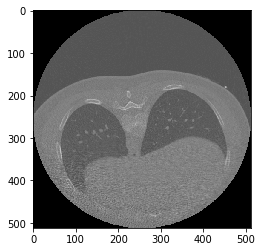

420
Loading dicom files ... This may take a moment.


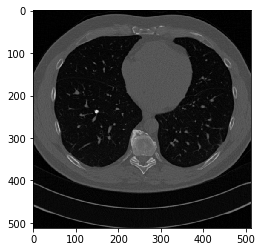

423
Loading dicom files ... This may take a moment.


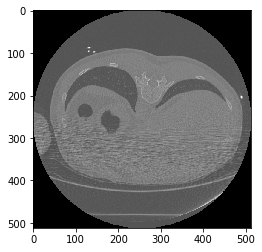

427
Loading dicom files ... This may take a moment.


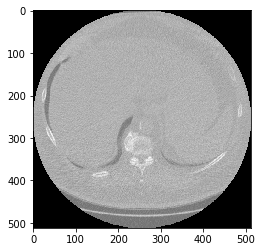

434
Loading dicom files ... This may take a moment.


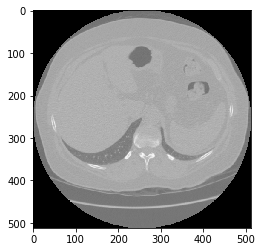

438
Loading dicom files ... This may take a moment.


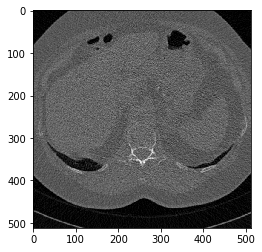

447
Loading dicom files ... This may take a moment.


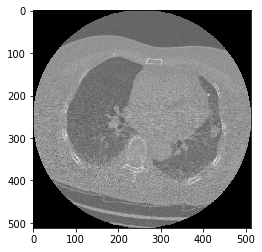

453
Loading dicom files ... This may take a moment.


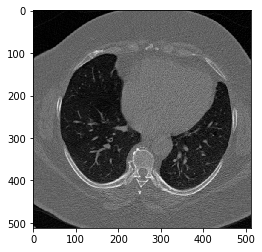

457
Loading dicom files ... This may take a moment.


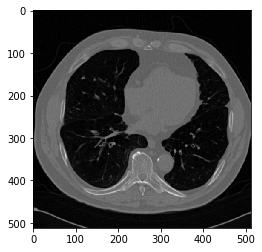

458
Loading dicom files ... This may take a moment.


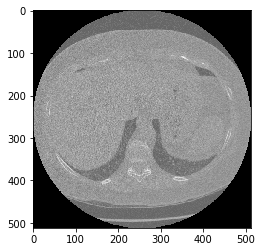

459
Loading dicom files ... This may take a moment.


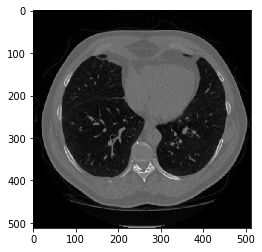

462
Loading dicom files ... This may take a moment.


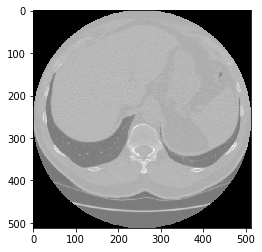

463
Loading dicom files ... This may take a moment.


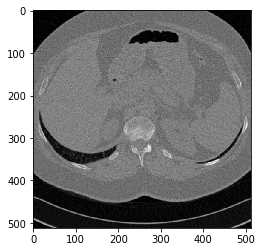

467
Loading dicom files ... This may take a moment.


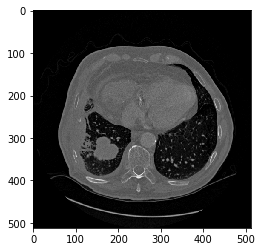

475
Loading dicom files ... This may take a moment.


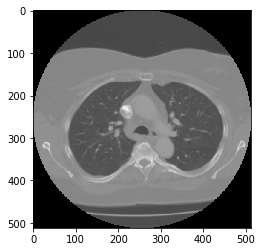

476
Loading dicom files ... This may take a moment.


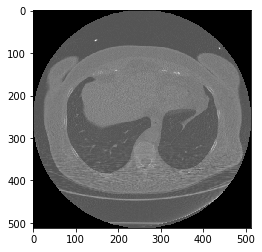

480
Loading dicom files ... This may take a moment.


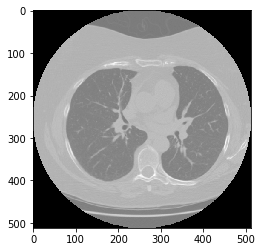

487
Loading dicom files ... This may take a moment.


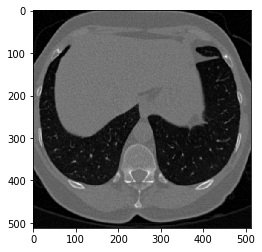

513
Loading dicom files ... This may take a moment.


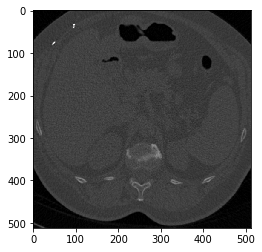

523
Loading dicom files ... This may take a moment.


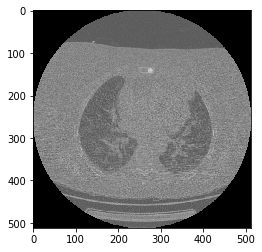

524
Loading dicom files ... This may take a moment.


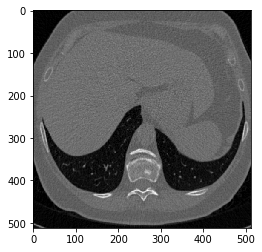

532
Loading dicom files ... This may take a moment.


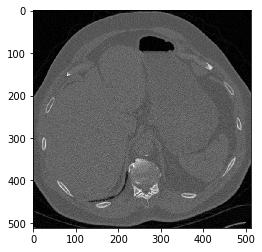

539
Loading dicom files ... This may take a moment.


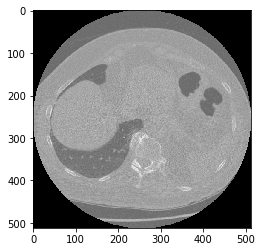

541
Loading dicom files ... This may take a moment.


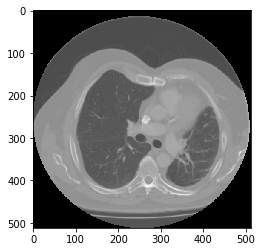

546
Loading dicom files ... This may take a moment.


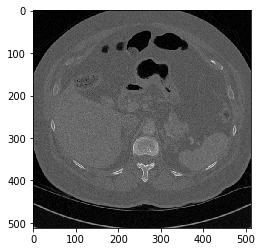

551
Loading dicom files ... This may take a moment.


RuntimeError: Couldn't find DICOM files for Scan(id=557,patient_id=LIDC-IDRI-0551) in /media/HDD2TB_2/LIDC-IDRI/LIDC-IDRI-0551

In [62]:
for i in list(ya)[36:-10]:
    
    print(i)
    pid = 'LIDC-IDRI-0'+str(i)
    scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()
    vol = scan.to_volume()

    plt.imshow(vol[:,:,70], 'gray')
    plt.show()

In [ ]:
714, 305, 339, 353, 361, 369, 423, 447, 523

Loading dicom files ... This may take a moment.


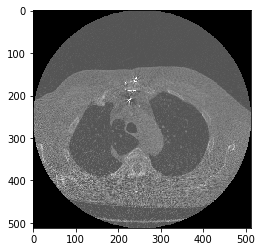

In [83]:
pid = 'LIDC-IDRI-0'+str(361)
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()
vol = scan.to_volume()

plt.imshow(vol[:,:,190], 'gray')
plt.show()

# 32 check

In [176]:
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import scipy.ndimage
import matplotlib.pyplot as plt

def plot_3d(image, threshold=-300):
    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the camera
    p = image.transpose(2,1,0)
    
    verts, faces, norm, val = measure.marching_cubes_lewiner(p, threshold)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.60)
    face_color = [0.30, 0.60, 0.60]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    ax.set_xlim(20, p.shape[0]-40)
    ax.set_ylim(70, p.shape[1]-20)
    ax.set_zlim(0, p.shape[2]-20)

    plt.show()

In [199]:
files1 = glob.glob('/media/HDD2TB_2/nathan/segmented_lungs/64_Predictions/**')
files2 = glob.glob('/media/HDD2TB_2/nathan/segmented_lungs/64_Pred_7/**')
files3 = glob.glob('/media/HDD2TB_2/nathan/segmented_lungs/32_Predictions/**')
files4 = glob.glob('/media/HDD2TB_2/nathan/segmented_lungs/32_pred_trr/**')

In [200]:
i = 0
pred1 = np.load(files1[i])['arr_0']
pred2 = np.load(files2[i])['arr_0']
pred3 = np.load(files3[i])['arr_0']
pred4 = np.load(files4[i])['arr_0']

print(pred1.shape,pred2.shape,pred3.shape,pred4.shape)

(416, 272, 272) (272, 272, 416) (416, 272, 272) (272, 272, 416)


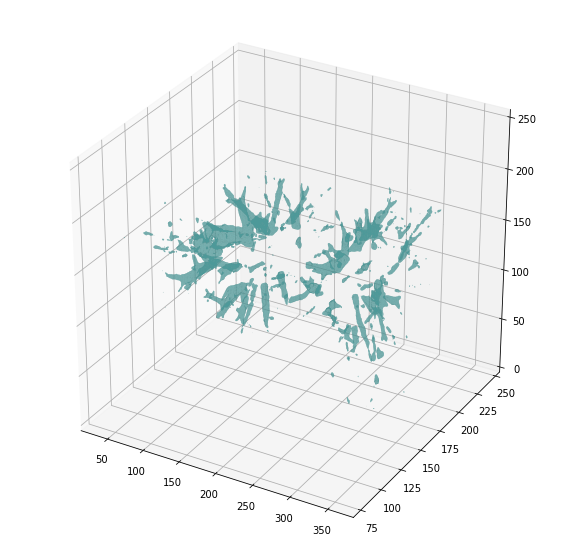

In [201]:
pred3 = np.swapaxes(pred3, 0, 2)
plot_3d(pred3, 0.1)

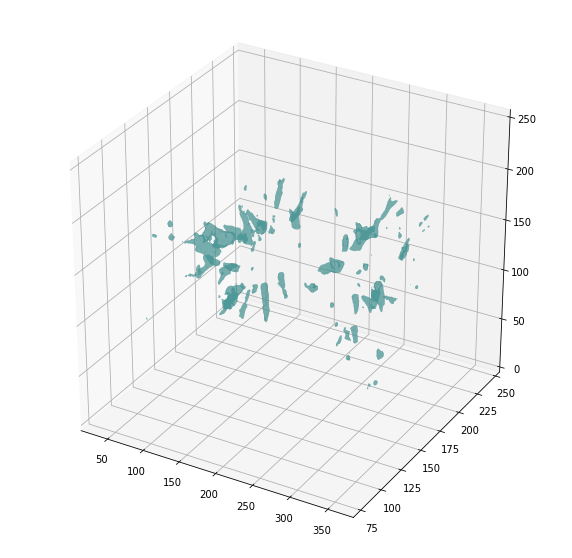

In [202]:
pred1 = np.swapaxes(pred1, 0, 2)
plot_3d(pred1, 0.1)

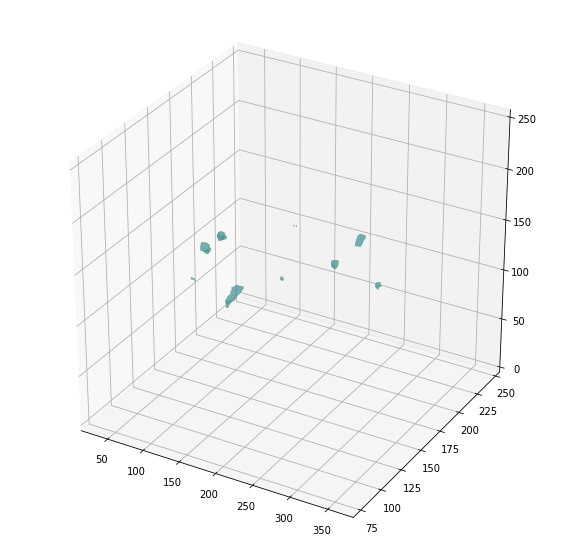

In [223]:
#pred2 = np.swapaxes(pred2, 0, 1)
plot_3d(a, 0.01)

In [220]:
a = np.power(pred3*np.power(pred4,1/8),8)

In [221]:
a = np.round(a, 5)

In [53]:
trues =  glob.glob('/media/HDD2TB_2/nathan/segmented_lungs/nods_boxed/**')
preds =  glob.glob('/media/HDD2TB_2/nathan/segmented_lungs/64_res/**')

In [54]:
thr = np.arange(0,1.05,0.05)

TP = np.zeros(21)
FP = np.zeros(21)
TN = np.zeros(21)
FN = np.zeros(21)

dsc = []

for i in range(10,60):
    print(i)
    true = np.load(trues[i])['arr_0']
    pred = np.load(preds[i])['arr_0']
    
    pred = np.swapaxes(pred, 2, 1)
    pred = np.swapaxes(pred, 2, 0)
    
    for th in thr:
        tr_pred = (pred>th).astype(float)
        
        tp = (tr_pred*true).sum()
        fp = tr_pred.sum() - tp
        fn = true.sum() - tp
        tn = true.shape[0]*true.shape[1]*true.shape[2] - tp - fp - fn
        
        TP[int(th*20)] += tp
        FP[int(th*20)] += fp
        TN[int(th*20)] += tn
        FN[int(th*20)] += fn
        
TPR = TP/(TP+FN)
DSC = 2*TP/(2*TP+FP+FN)

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


# Examples

In [185]:
plt.rcParams['figure.figsize'] = [15, 11.5]

In [200]:
trues =  glob.glob('/media/HDD2TB_2/nathan/segmented_lungs/nods_boxed/**')
preds =  glob.glob('/media/HDD2TB_2/nathan/segmented_lungs/64_Predictions/**')
lungs =  glob.glob('/media/HDD2TB_2/nathan/segmented_lungs/lungs_boxed/**')
fprs = glob.glob('/media/HDD2TB_2/nathan/segmented_lungs/32_pred_trr/**')
colors = glob.glob('/media/HDD2TB_2/nathan/segmented_lungs/color/**')
cleans = glob.glob('/media/HDD2TB_2/nathan/clean_scans/**')

In [201]:
i = 22
true = np.load(trues[i])['arr_0']
lung = np.load(lungs[i])['arr_0']
pred = np.load(preds[i])['arr_0']
fpr = np.load(fprs[i])['arr_0']
color = np.load(colors[i])['arr_0']
pred = np.swapaxes(pred, 2, 0)
pred = np.swapaxes(pred, 2, 1)
fpr = np.swapaxes(fpr, 2, 1)
fpr = np.swapaxes(fpr, 2, 0)
color = np.swapaxes(color, 2, 1)
color = np.swapaxes(color, 2, 0)

In [202]:
print(true.shape,lung.shape,pred.shape,fpr.shape, clean.shape)

(256, 384, 144) (256, 384, 144) (256, 384, 144) (256, 384, 144) (512, 512, 154)


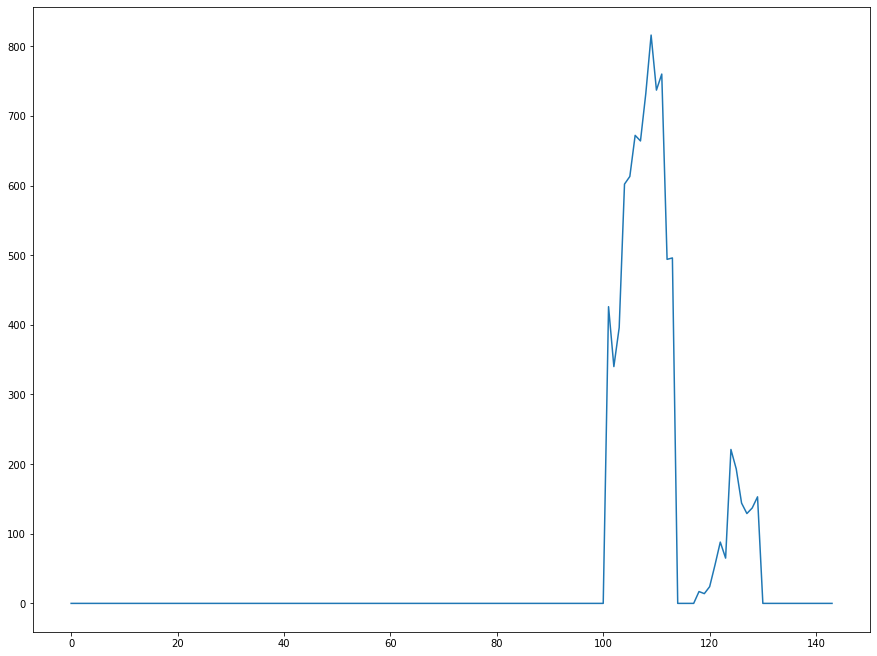

In [203]:
plt.plot(np.sum(np.sum(true, axis=0), axis=0))

In [204]:
z = 110

/home/nathan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


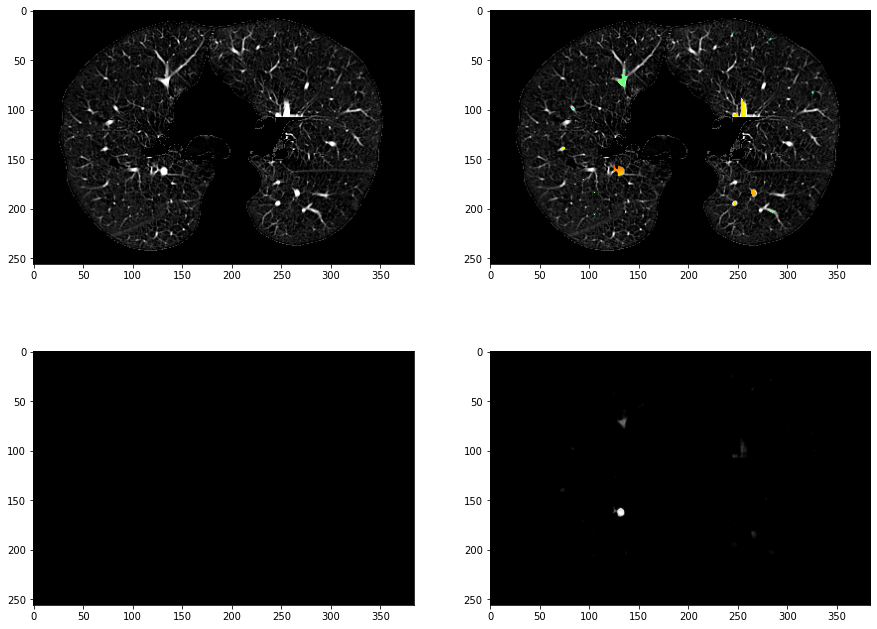

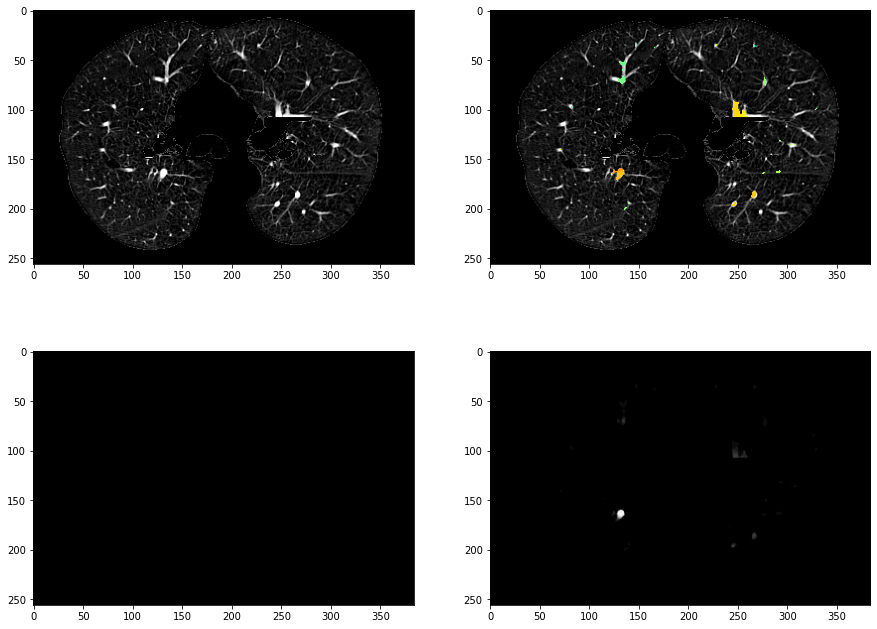

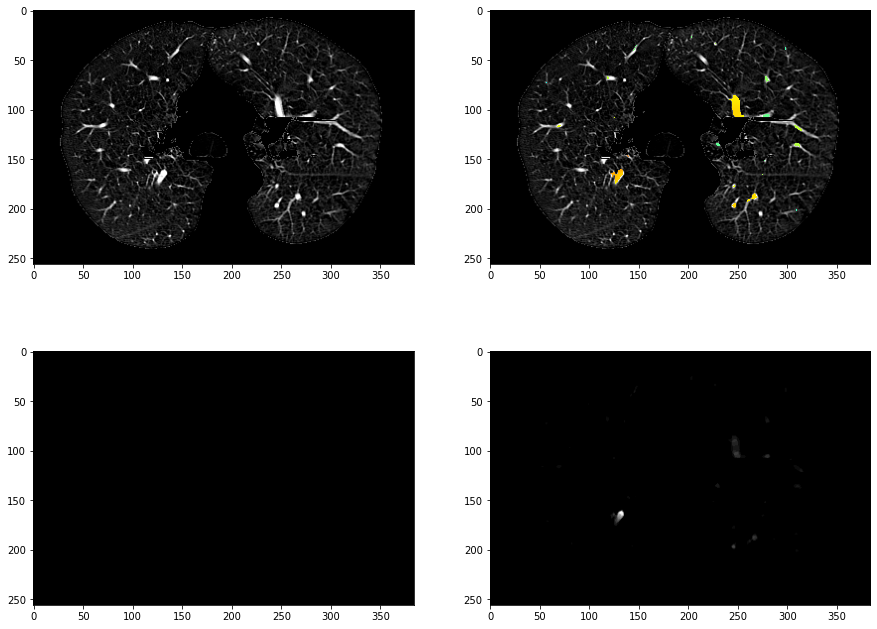

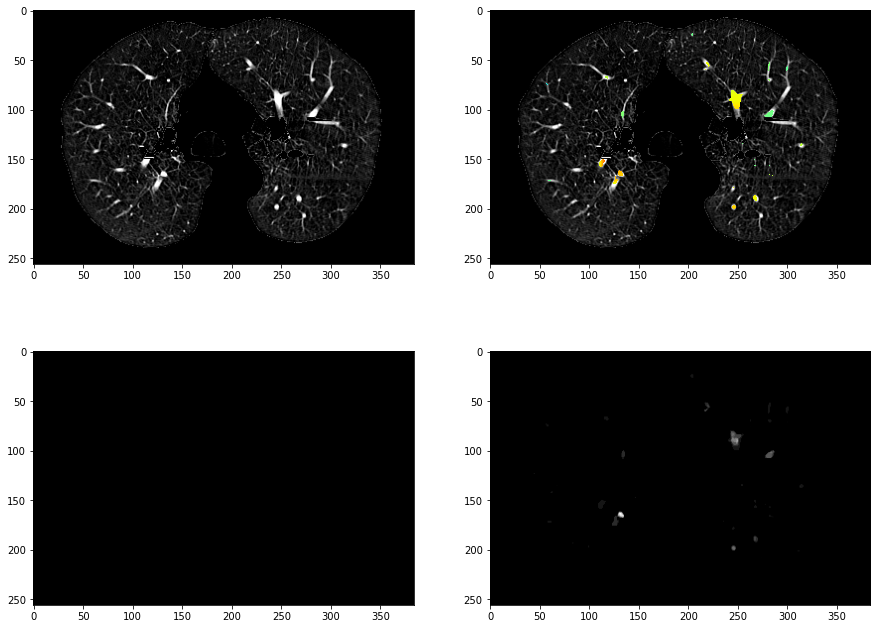

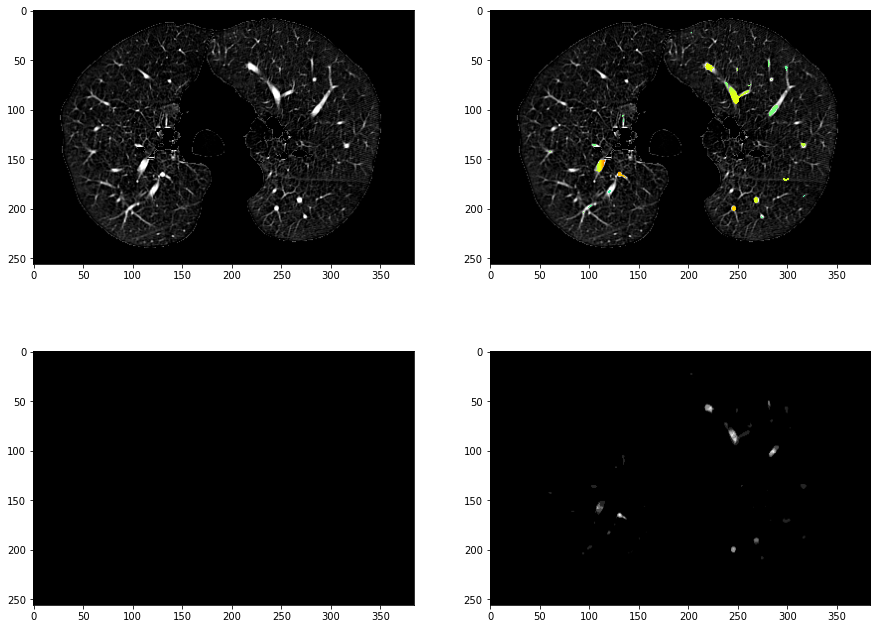

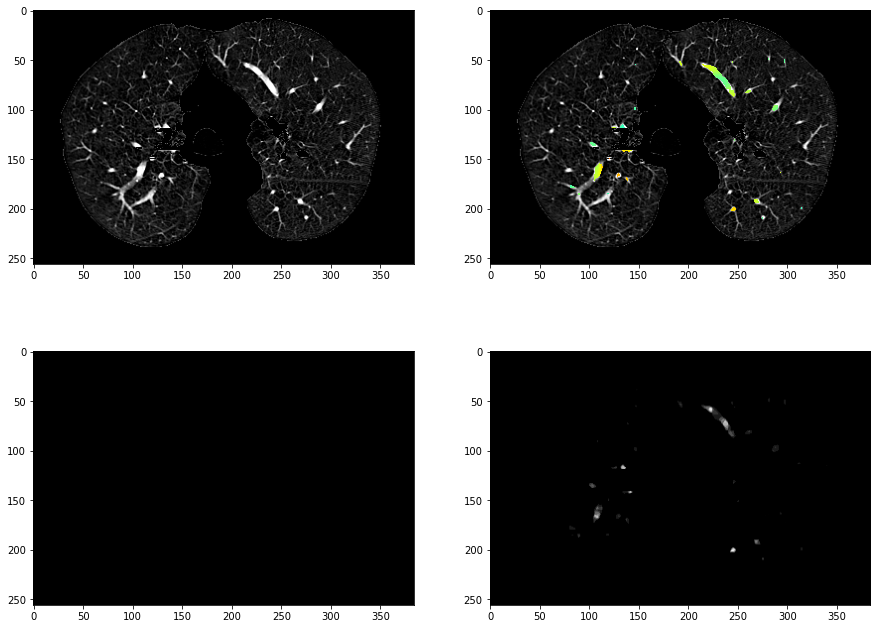

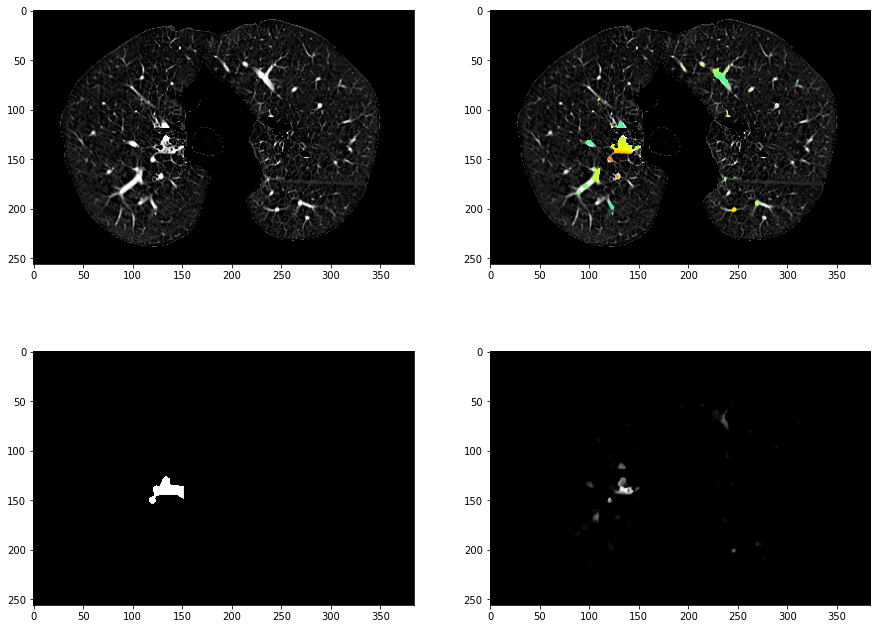

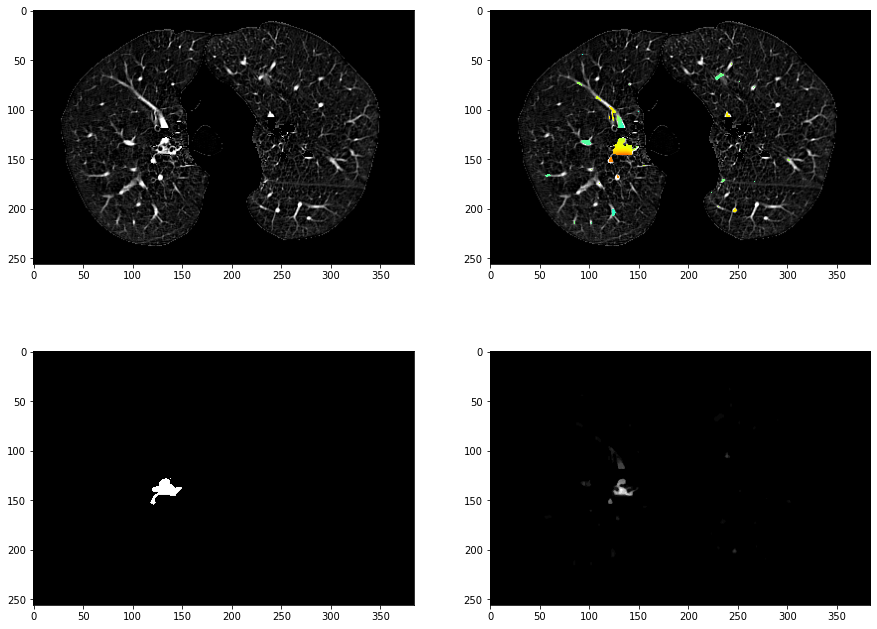

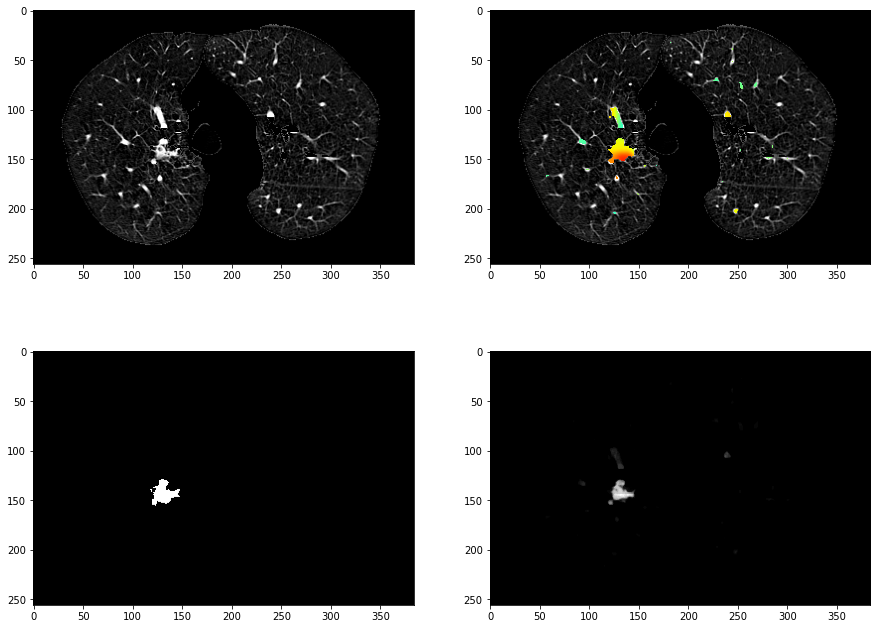

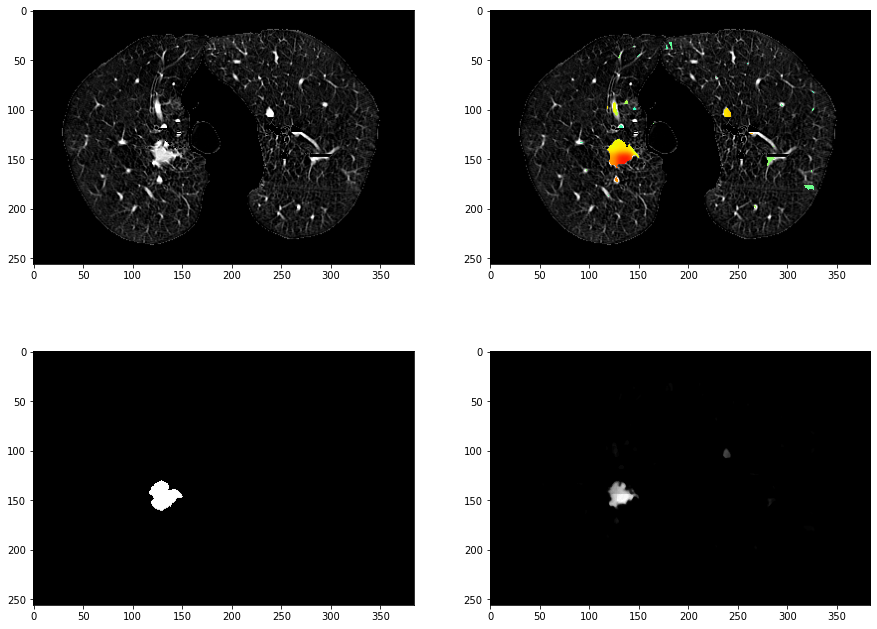

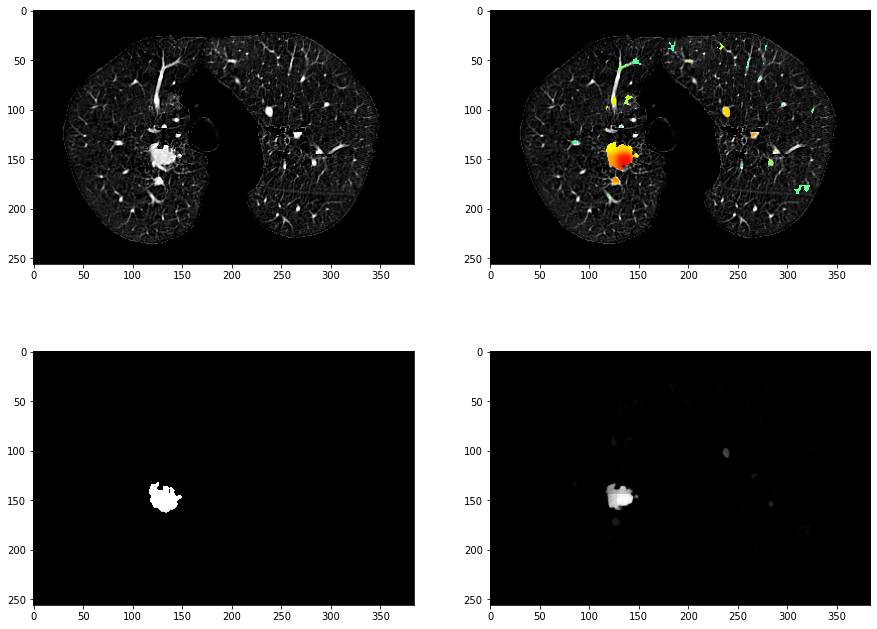

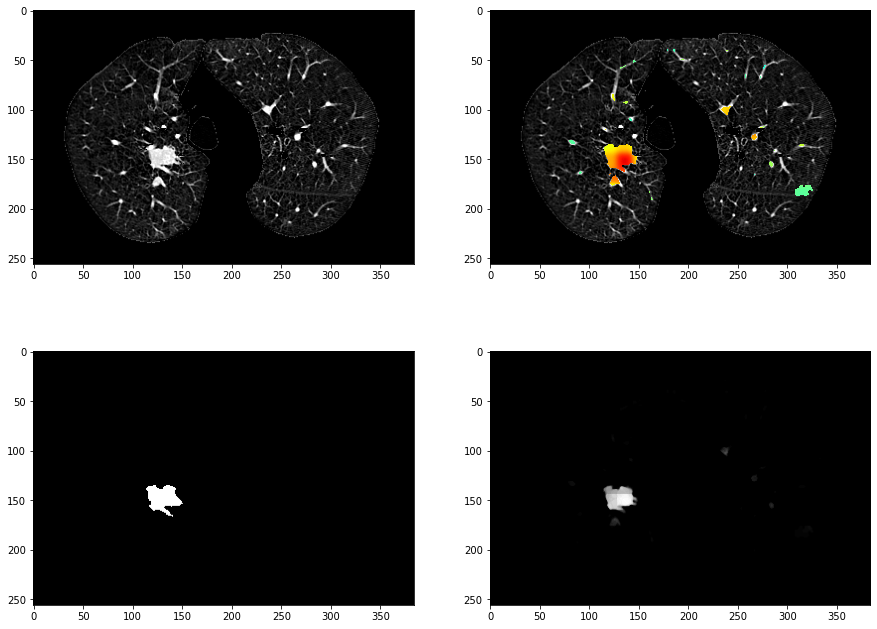

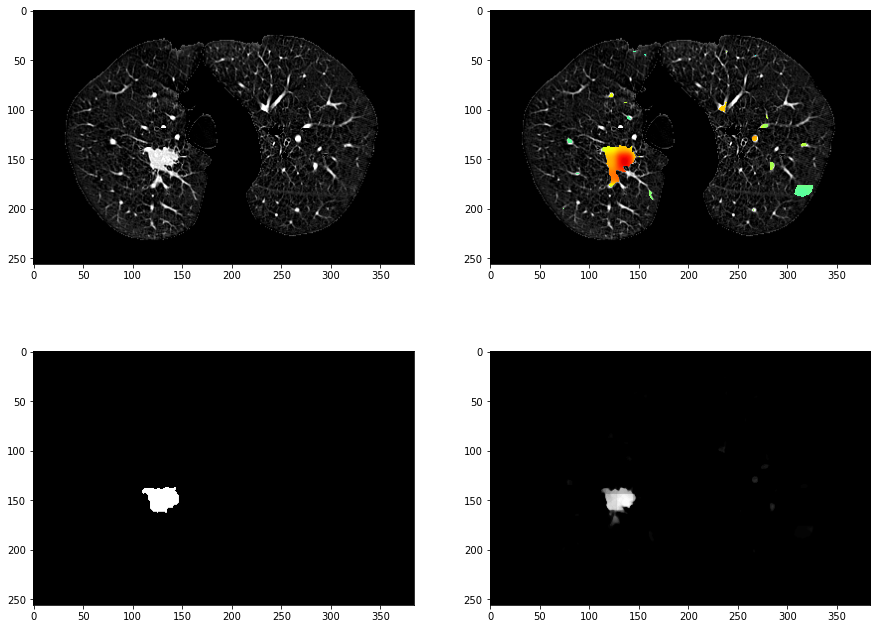

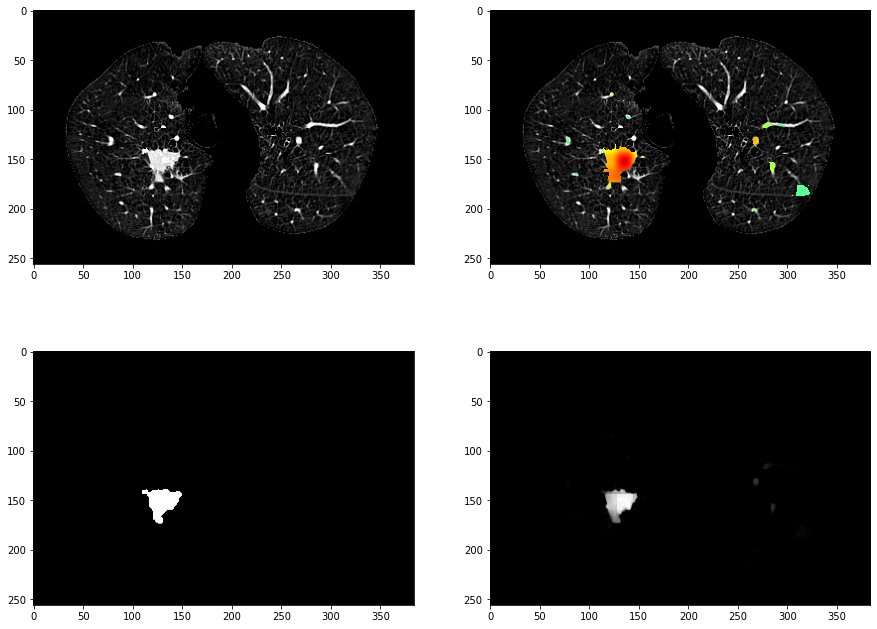

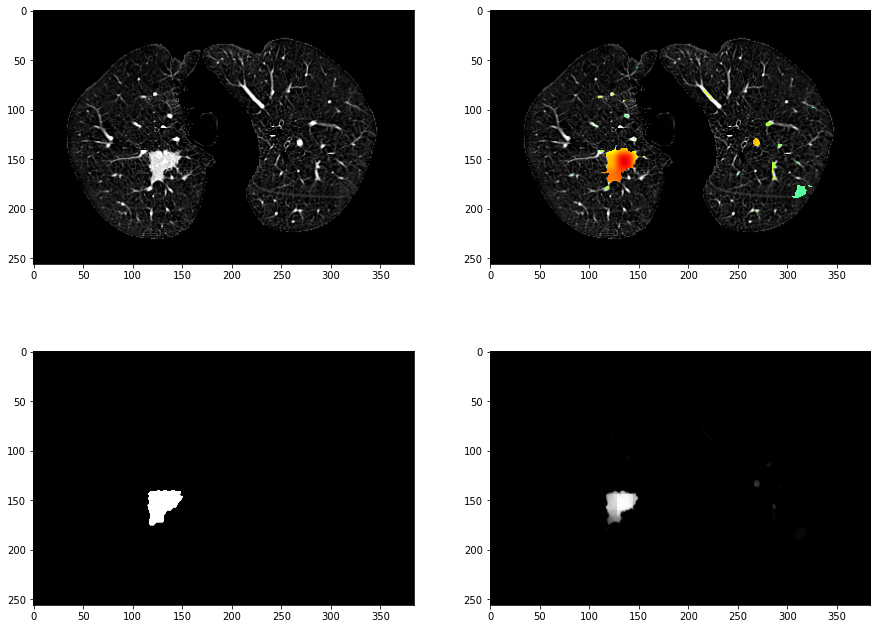

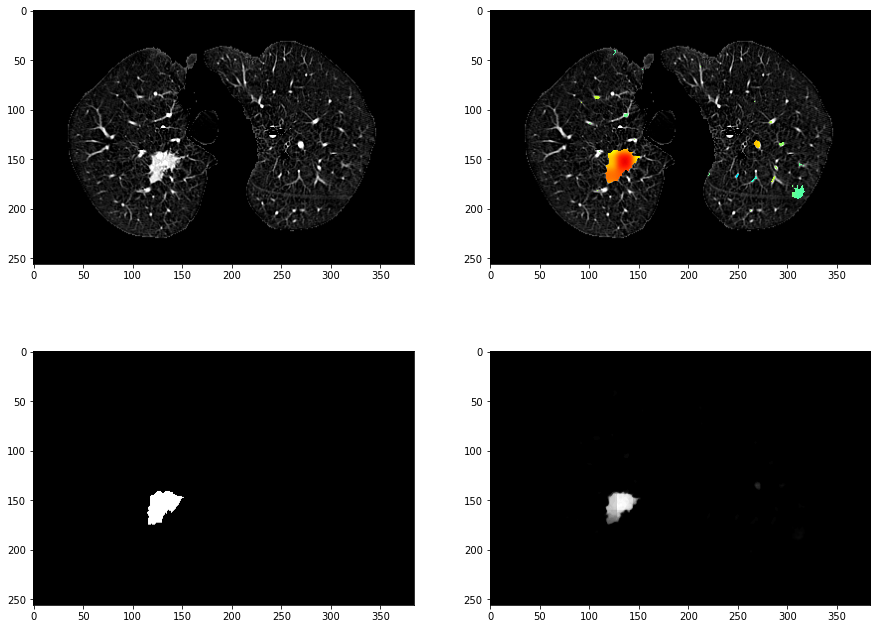

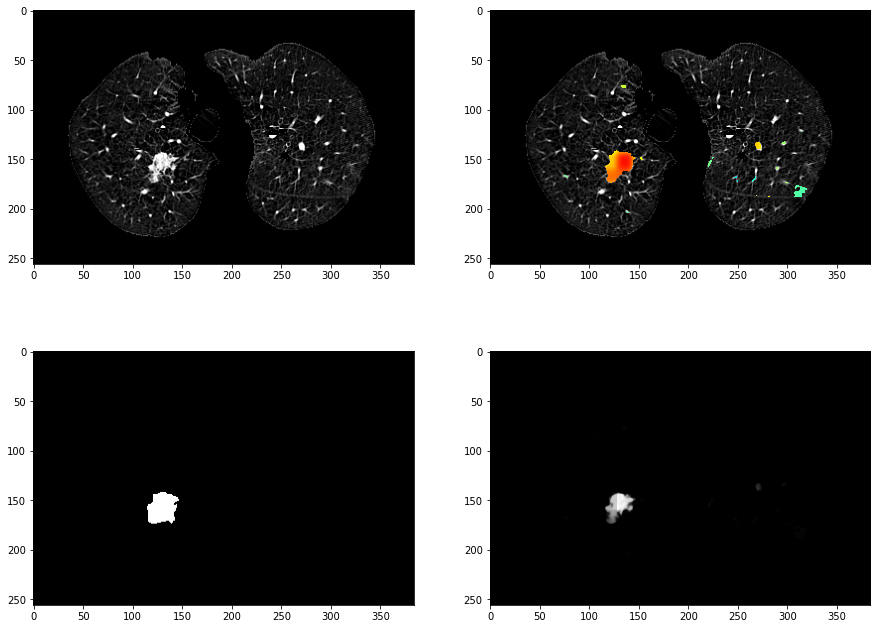

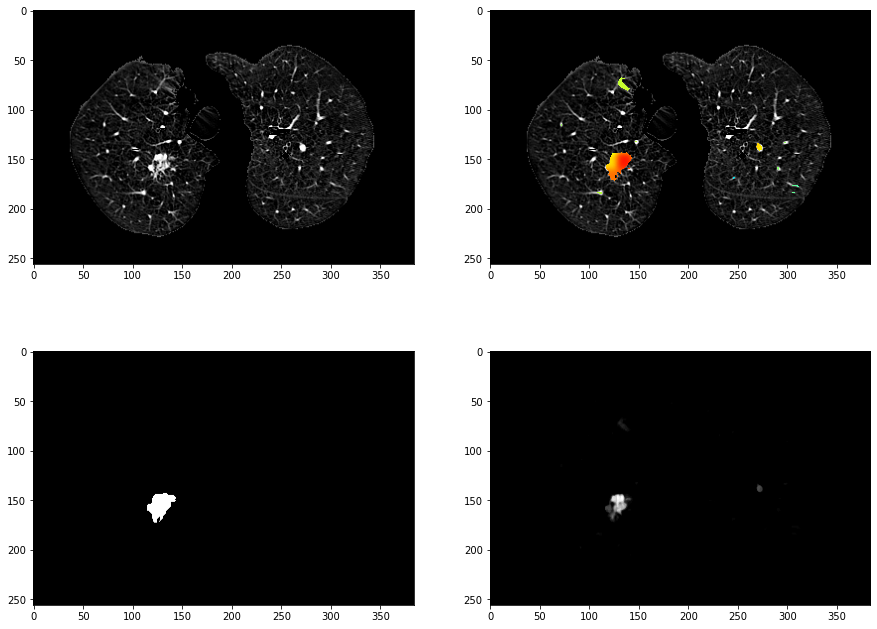

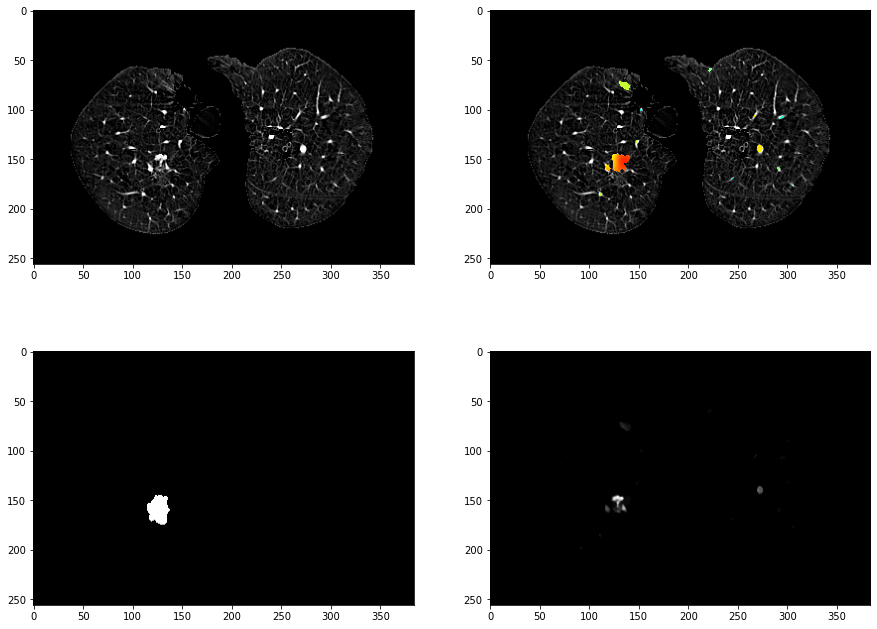

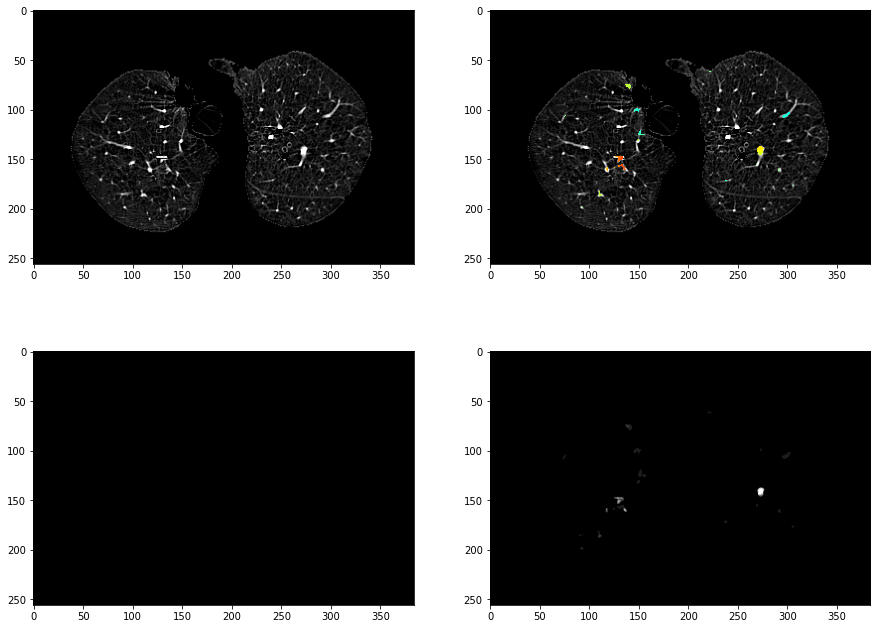

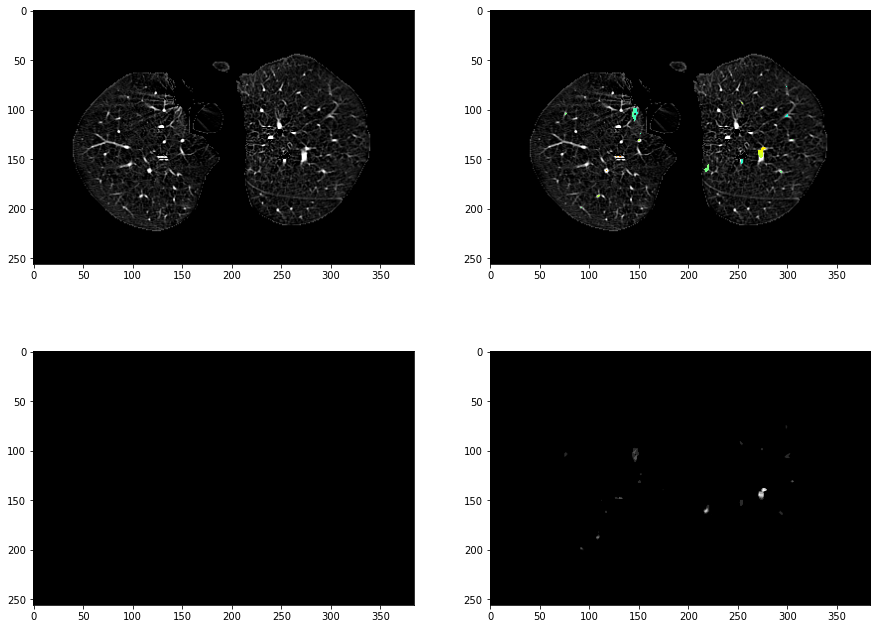

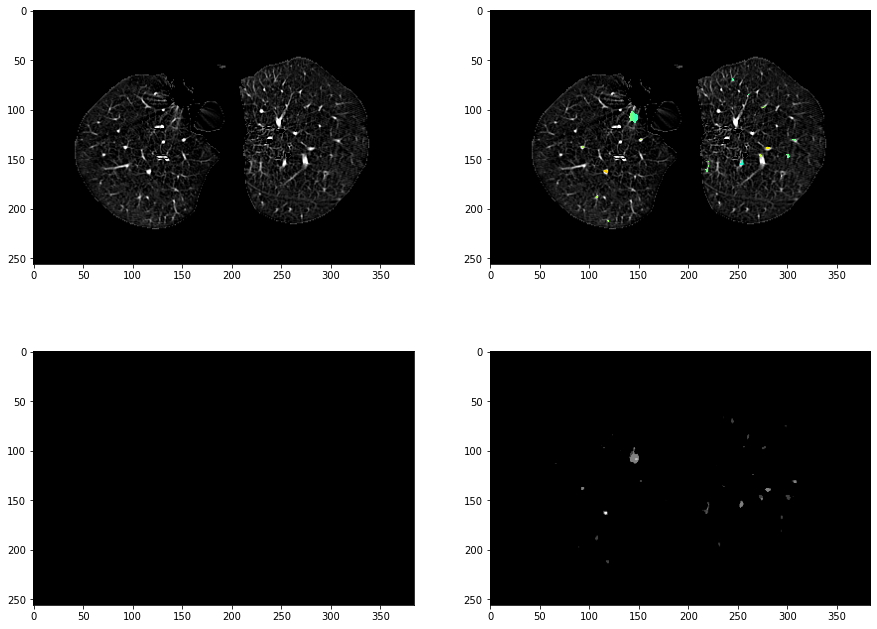

In [207]:
for z in range(95,117):
    f, axarr = plt.subplots(2,2)
    axarr[0,0].imshow(lung[:,:,z], cmap='gray')
    axarr[1,0].imshow(true[:,:,z], cmap='gray')
    axarr[0,1].imshow(lung[:,:,z], cmap='gray')
    axarr[0,1].imshow(np.ma.masked_where(pred[:,:,z] < 0.001, gaussian_filter(np.power(color,1.3),sigma=3)[:,:,z]), cmap='jet',vmin=0,vmax=1)
    axarr[1,1].imshow(pred[:,:,z], cmap='gray')
    plt.savefig('0_'+str(z))

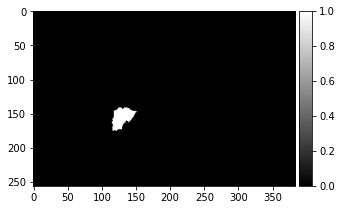

In [166]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.figure()
ax = plt.gca()
im = ax.imshow(true[:,:,z], cmap='gray')
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.savefig('1.png')
plt.colorbar(im, cax=cax)

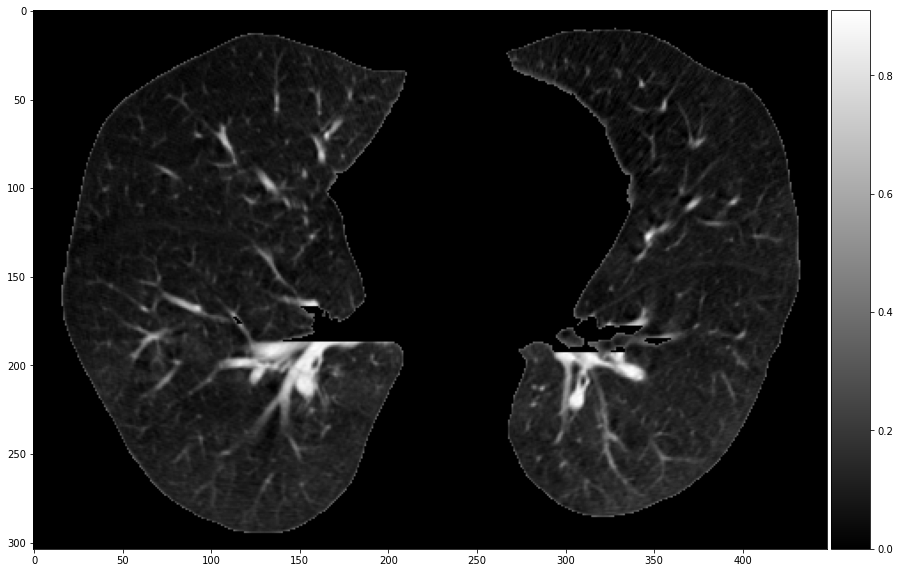

In [160]:
plt.figure()
ax = plt.gca()
im = ax.imshow(lung[:,:,z], cmap='gray')
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.savefig('0.png')
plt.colorbar(im, cax=cax)

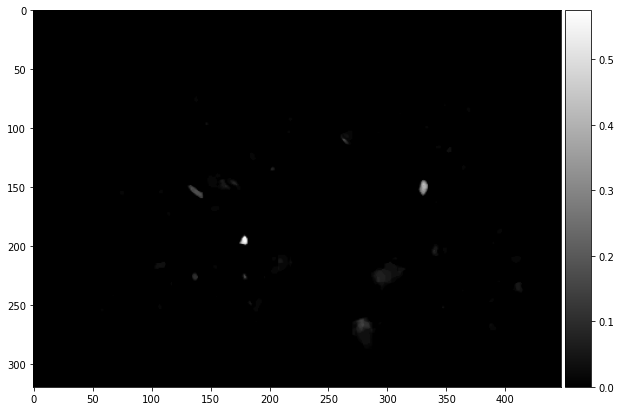

In [89]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.figure()
ax = plt.gca()
im = ax.imshow(pred[:,:,z+25], cmap='gray')
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.savefig('scan.png')

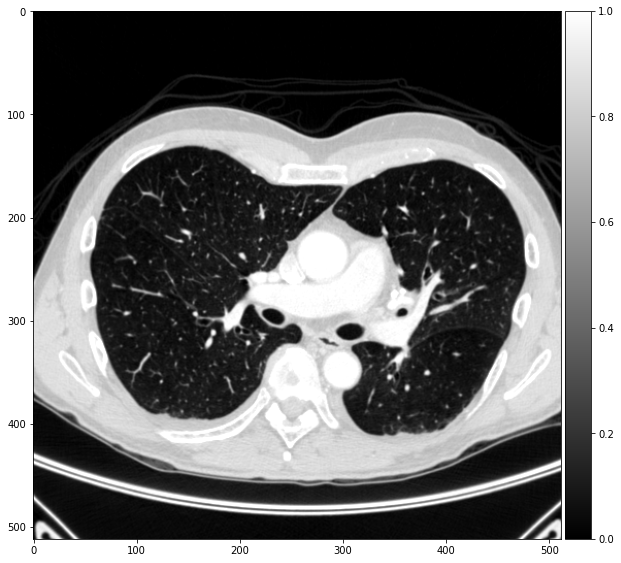

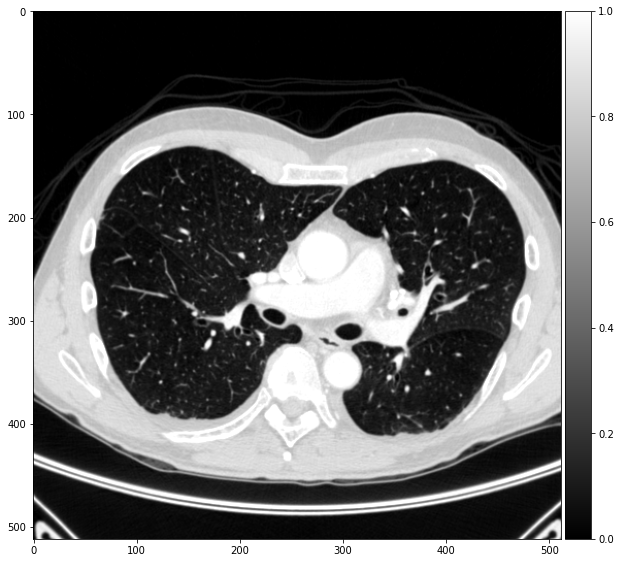

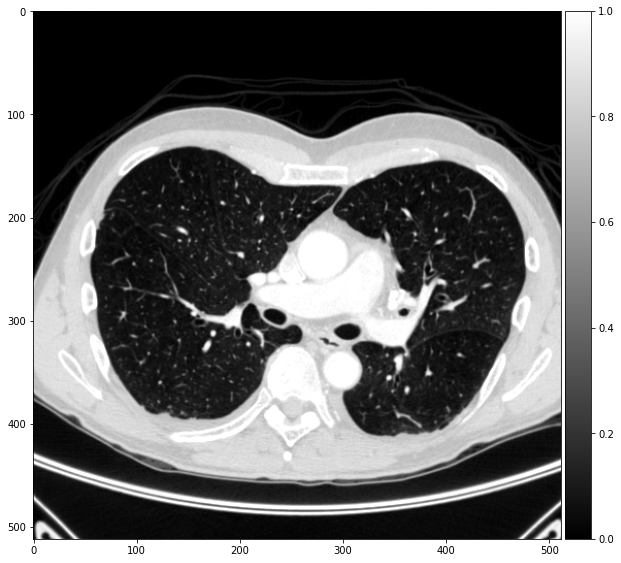

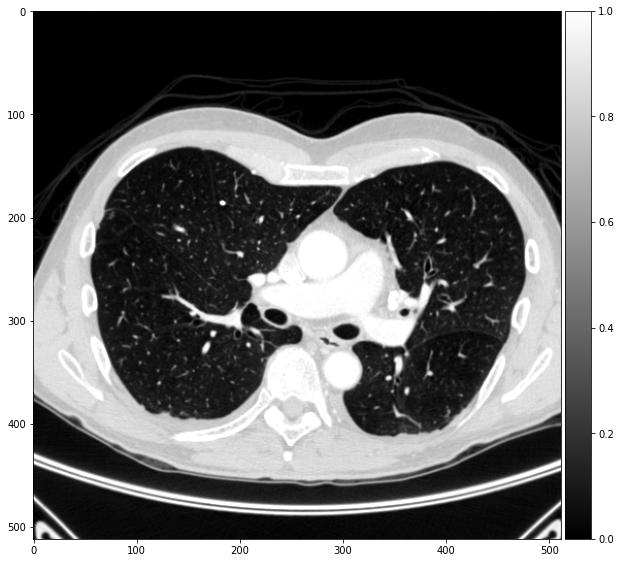

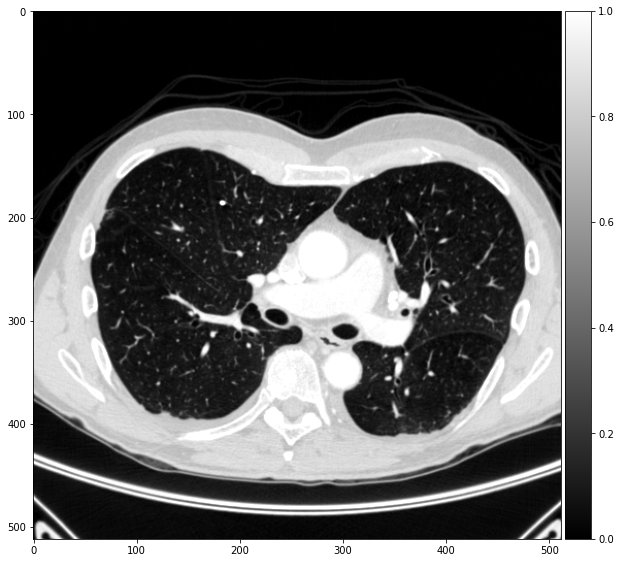

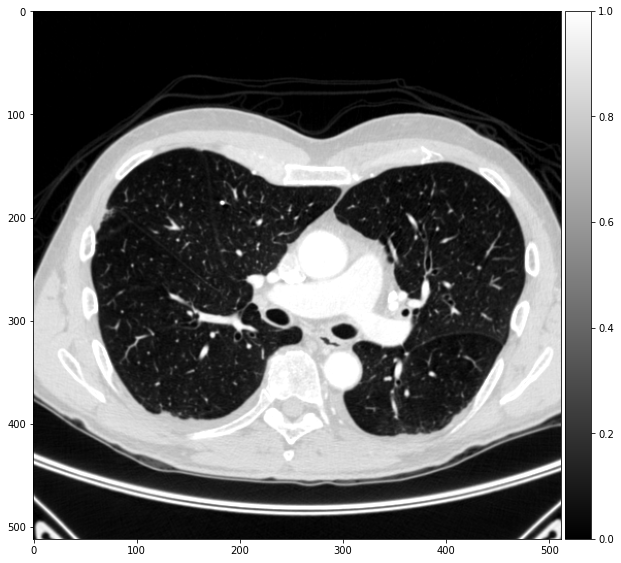

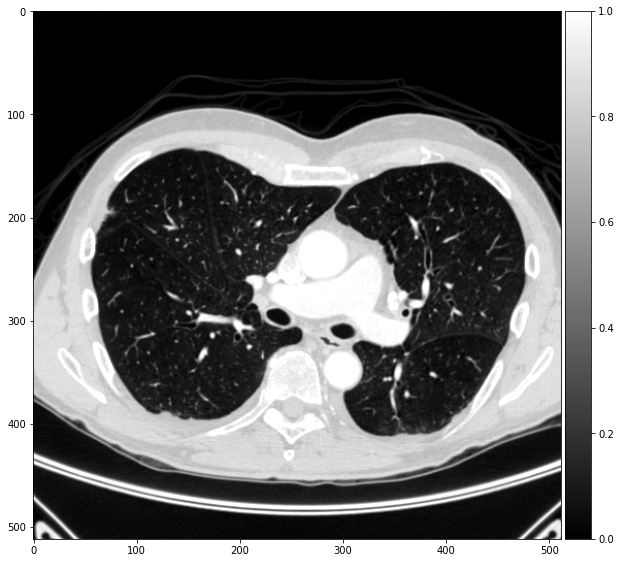

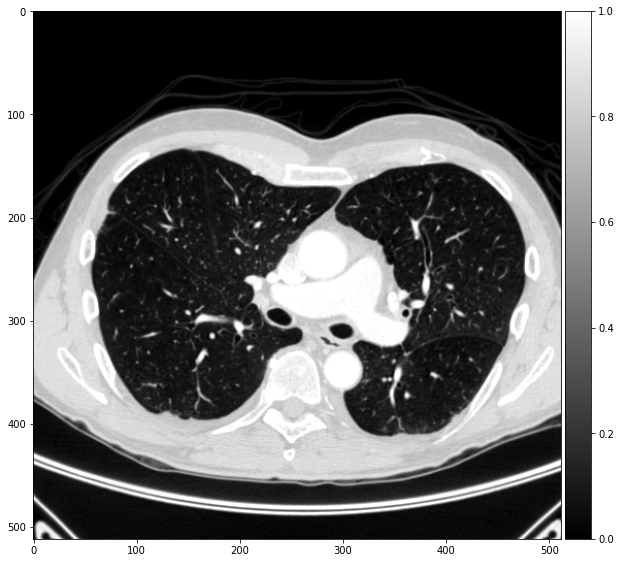

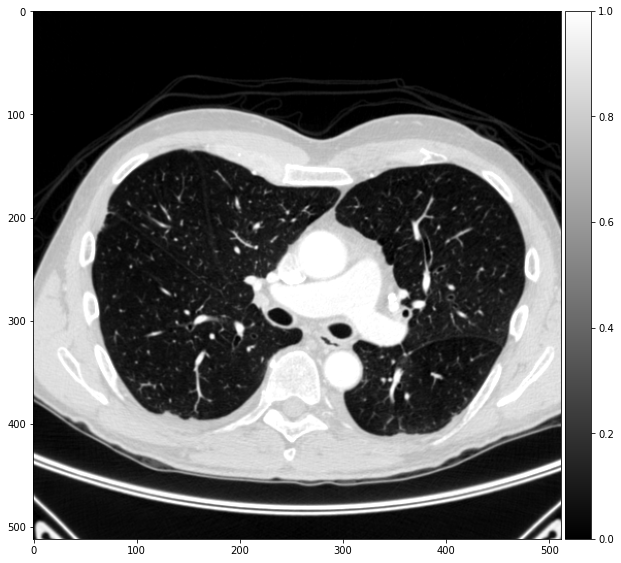

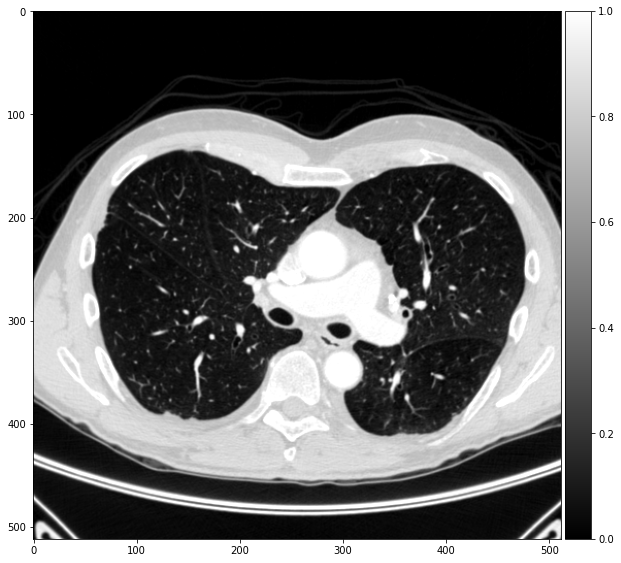

In [88]:
for i in range(-5,5):
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.figure()
    ax = plt.gca()
    im = ax.imshow(clean[:,:,z+25+i], cmap='gray')
    # create an axes on the right side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.05 inch.
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.savefig('scan'+str(i+5)+'.png')

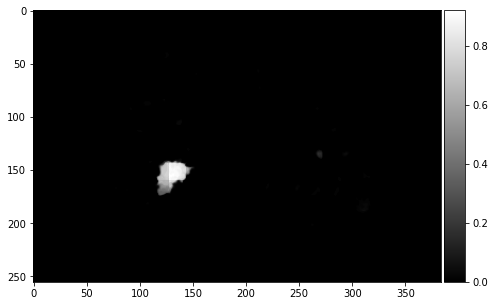

In [727]:
plt.figure()
ax = plt.gca()
im = ax.imshow(pred[:,:,z], cmap='gray')
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.savefig('1.png')
plt.colorbar(im, cax=cax)